# Table of Contents
 <p><div class="lev1 toc-item"><a href="#load-data" data-toc-modified-id="load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load data</a></div><div class="lev1 toc-item"><a href="#summary-stats" data-toc-modified-id="summary-stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>summary stats</a></div><div class="lev1 toc-item"><a href="#calc-dispersion-and-regression" data-toc-modified-id="calc-dispersion-and-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>calc dispersion and regression</a></div><div class="lev1 toc-item"><a href="#spot-check" data-toc-modified-id="spot-check-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>spot-check</a></div><div class="lev2 toc-item"><a href="#scatter-plot" data-toc-modified-id="scatter-plot-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>scatter plot</a></div><div class="lev2 toc-item"><a href="#time-series" data-toc-modified-id="time-series-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>time series</a></div><div class="lev2 toc-item"><a href="#by-year" data-toc-modified-id="by-year-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>by year</a></div>

In [2]:
import python.mytoolkit.monkey as mk

# load data

download and save data

In [3]:
from pandas_datareader import data, wb
def kf(name):
    df = data.DataReader(name, "famafrench", '1920-1-1')[0].rename(lambda x: x.to_timestamp())
    df[df==-99.99] = None
    df = df/100.
    return df

ff_3fac = kf("F-F_Research_Data_Factors")
ff_5fac = kf("F-F_Research_Data_5_Factors_2x3")
ff_mom = kf('F-F_Momentum_Factor').rename(columns=lambda x: x.strip())
ff_3m = concat([ff_3fac.iloc[:,:3],ff_mom],axis=1)

# ff_5ind = kf("5_Industry_Portfolios")
# ff_10ind = kf("10_Industry_Portfolios")
# ff_17ind = kf("17_Industry_Portfolios")
ff_49ind = kf('49_Industry_Portfolios')
ff_49ind2 = kf('49_Industry_Portfolios_Wout_Div') 

# ff_ = DataReader("F-F_Research_Data_Factors_weekly", "famafrench")
# ff = DataReader("6_Portfolios_2x3", "famafrench")
# ff = DataReader("F-F_ST_Reversal_Factor", "famafrench")

In [1]:
ff_3fac.to_pickle('data/ff_3fac.pkl')
ff_5fac.to_pickle('data/ff_5fac.pkl')
ff_mom.to_pickle('data/ff_mom.pkl')
ff_3m.to_pickle('data/ff_3m.pkl')
ff_49ind.to_pickle('data/ff_49ind.pkl')
ff_49ind2.to_pickle('data/ff_49ind_no_div.pkl')

load saved data

In [3]:
ff_3fac = read_pickle('data/ff_3fac.pkl')
ff_5fac = read_pickle('data/ff_5fac.pkl')
ff_mom = read_pickle('data/ff_mom.pkl')
ff_3m = read_pickle('data/ff_3m.pkl')
ff_49ind = read_pickle('data/ff_49ind.pkl')
ff_49ind2 = read_pickle('data/ff_49ind_no_div.pkl')

# summary stats

In [10]:
ff_49ind2.describe().T.to_clipboard()

how many industries are there?

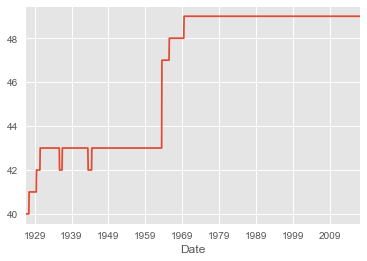

In [5]:
ff_49ind2.count(1).plot();

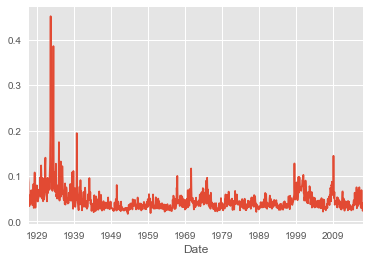

In [7]:
ff_49ind2.std(1).plot();

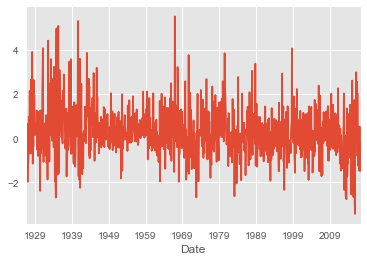

In [11]:
ff_49ind2.skew(1).plot();

In [5]:
ff_49ind2.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,0.0227,-0.0013,NaN,-0.0519,0.0126,0.0865,0.0244,0.5021,-0.0062,0.0798,...,0.0709,0.0162,-0.2379,-0.0017,0.0162,0.0461,-0.0054,0.0276,-0.0508,0.0520
1926-08-01,0.0223,0.0256,NaN,0.2703,0.0589,0.1681,-0.0081,0.4298,-0.0431,-0.0271,...,-0.0275,0.0446,0.0539,-0.0098,-0.0054,0.1183,0.0257,0.0389,-0.0057,0.0668
1926-09-01,-0.0137,0.0083,NaN,0.0402,0.0060,0.0833,0.0507,-0.0491,0.0025,-0.0136,...,-0.0556,-0.0025,-0.0787,0.0009,-0.0126,-0.0295,0.0062,-0.0306,-0.0328,-0.0386
1926-10-01,-0.0056,-0.0408,NaN,-0.0331,0.0103,-0.0140,-0.0514,0.0537,-0.0516,0.0002,...,-0.0567,-0.0294,-0.1538,-0.0244,-0.0437,-0.1182,-0.0428,-0.0587,0.0182,-0.0849
1926-11-01,0.0675,0.0612,NaN,0.0729,0.0399,0.0000,0.0177,-0.0979,-0.0116,0.0167,...,0.0341,0.0108,0.0467,0.0598,0.0389,-0.0297,0.0358,0.0072,0.0492,0.0391


# calc dispersion and regression

Dispersion:
- cross section std dev
- average pairwise correlation

In [5]:
c = ff_49ind2.rolling(24).corr(pairwise=True)

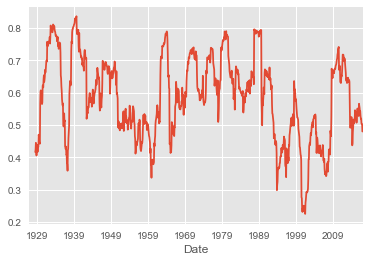

In [21]:
ac = c.unstack().mean(1)
ac.plot();

Regression with 12-month Newey West
- ret ~ lagged ret + disp

In [63]:
df = DataFrame({'mkt': log(1+ff_3fac['Mkt-RF']),
                'mkt_cum': (1+ff_3fac['Mkt-RF']).cumprod(), 
                'disp_std': ff_49ind2.rolling(12).mean().std(1),
                'skew': ff_49ind2.rolling(12).mean().skew(1),
                'disp_ac': ac
               })

rez_std = {}
rez_ac = {}

for i in range(24):
    df['mkt_%d'%i] = df.mkt.shift(-i)
    rez_std[i] = (sm.ols('mkt_%i ~ mkt + disp_std' % i,data=df.loc['1950':])
                  .fit(cov_type='HAC', cov_kwds={'maxlags': 12}, use_t=True).summary2())
    rez_ac[i] = (sm.ols('mkt_%i ~ mkt + disp_ac' % i,data=df.loc['1950':])
                 .fit(cov_type='HAC', cov_kwds={'maxlags': 12}, use_t=True).summary2())

In [54]:
rez_ac[6]

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.005     
Dependent Variable: mkt_6            AIC:                -2772.9638
Date:               2017-06-12 23:47 BIC:                -2758.9025
No. Observations:   802              Log-Likelihood:     1389.5    
Df Model:           2                F-statistic:        3.187     
Df Residuals:       799              Prob (F-statistic): 0.0418    
R-squared:          0.008            Scale:              0.0018378 
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
Intercept    -0.0084     0.0070   -1.2037   0.2291   -0.0222   0.0053
mkt          -0.0547     0.0352   -1.5526   0.1209   -0.1238   0.0145
disp_ac       0.0250     0.0121    2.0560   0.0401    0.0011   0.0488
-------------------------------------------------------------------
Omnibus:              126.857       Durbin-Watson:          1.826  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       349.327
Skew:                 -0.804        Prob(JB):               0.000  
Kurtosis:             5.806         Condition No.:          27     
===================================================================

"""

Cross sectional std dev

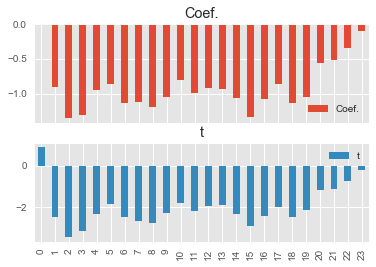

In [64]:
rez2 = DataFrame({i: rez_std[i].tables[1].loc['disp_std', ['Coef.', 't']] for i in rez_std}).T
rez2.plot.bar(subplots=True);

Average pairwise correlation

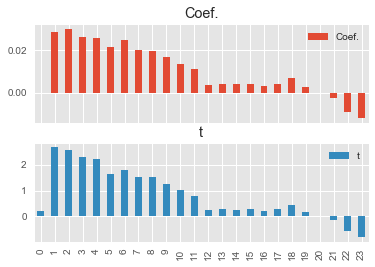

In [65]:
rez2 = DataFrame({i: rez_ac[i].tables[1].loc['disp_ac', ['Coef.', 't']] for i in rez_ac}).T
rez2.plot.bar(subplots=True);

# spot-check

## scatter plot

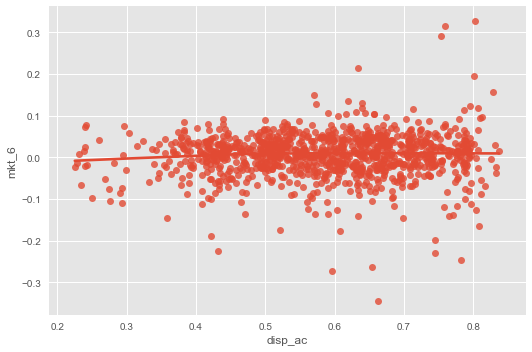

In [53]:
sns.lmplot('disp_ac', 'mkt_6', data=df, aspect=1.5, lowess=True);

## time series 

In [22]:
df = DataFrame({'mkt_cum': (1+ff_3fac['Mkt-RF']).cumprod(), 
                'log_mkt_cum': log(1+ff_3fac['Mkt-RF']).cumsum(), 
                'disp_std': ff_49ind2.rolling(12).mean().std(1),
                'skew': ff_49ind2.rolling(12).mean().skew(1).rolling(6).mean(),
                'disp_ac': ac
               })

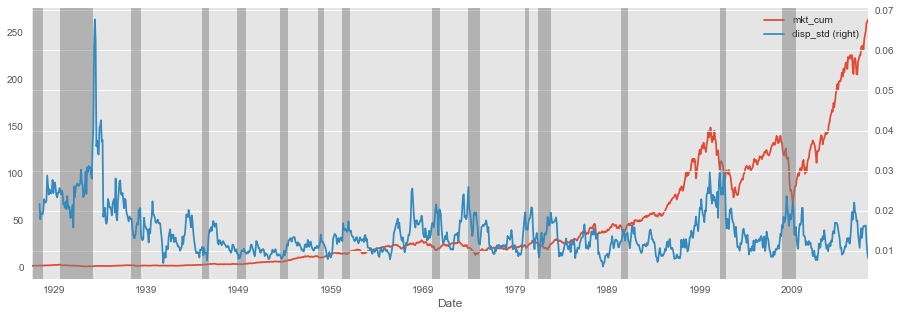

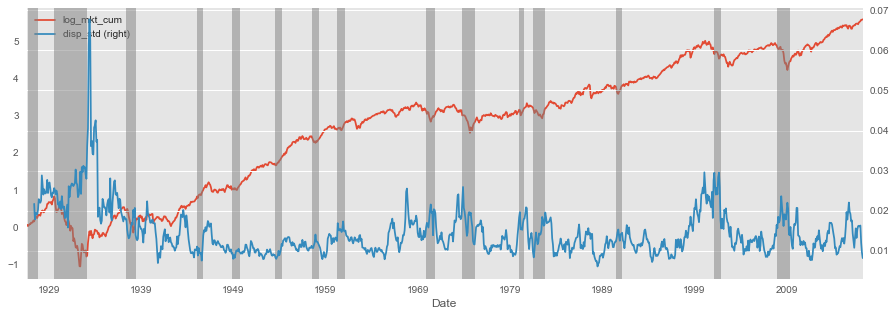

In [12]:
df[['mkt_cum','disp_std']].plot(secondary_y=['disp_std'],figsize=[15,5]);
mk.NBER_Shade()
df[['log_mkt_cum','disp_std']].plot(secondary_y=['disp_std'],figsize=[15,5]);
mk.NBER_Shade()

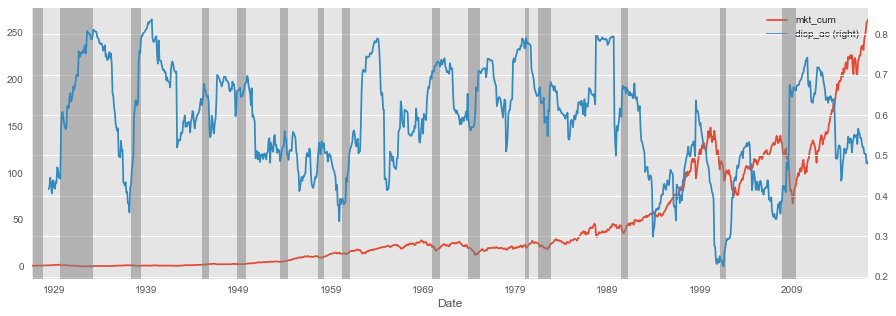

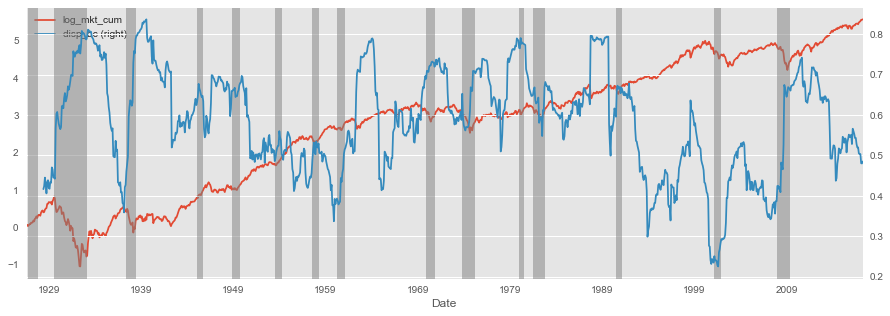

In [23]:
df[['mkt_cum','disp_ac']].plot(secondary_y=['disp_ac'],figsize=[15,5]);
mk.NBER_Shade()                
df[['log_mkt_cum','disp_ac']].plot(secondary_y=['disp_ac'],figsize=[15,5]);
mk.NBER_Shade()

## by year

In [131]:
rez = df.groupby(lambda x: x.year)[['mkt','disp','skew']].mean()

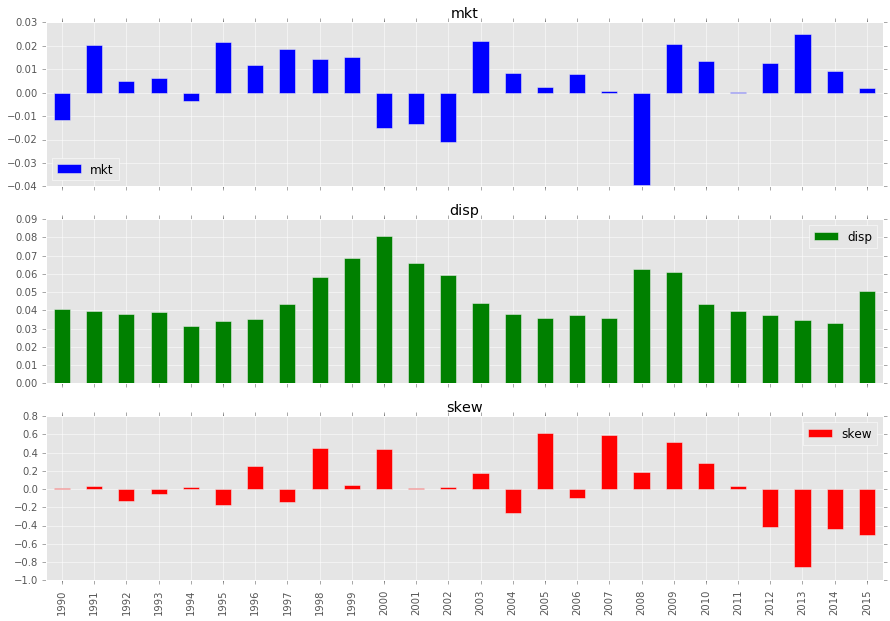

In [158]:
rez.ix[1990:].plot.bar(subplots=True,figsize=[15,10]);